In [1454]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [1455]:
df=pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Number of not survived passengers: 549
Number of survived passengers: 342


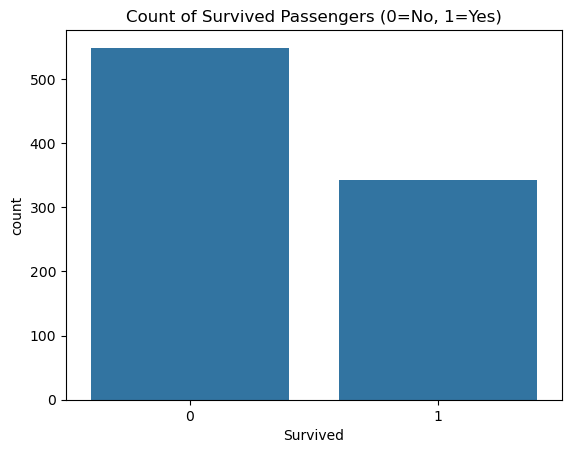

In [1456]:
# calculate how many passengers survived and how many didn’t and visualize it by countplot
survived_counts = df['Survived'].value_counts()
not_survived_count = survived_counts[0]
survived_count = survived_counts[1]

print(f"Number of not survived passengers: {not_survived_count}")
print(f"Number of survived passengers: {survived_count}")
sns.countplot(x='Survived', data=df)
plt.title('Count of Survived Passengers (0=No, 1=Yes)')
plt.show()

passengers survived are 342 passenger and passengers not survived are 549
therefore number of passengers not survived are greater than number of passengers survived 

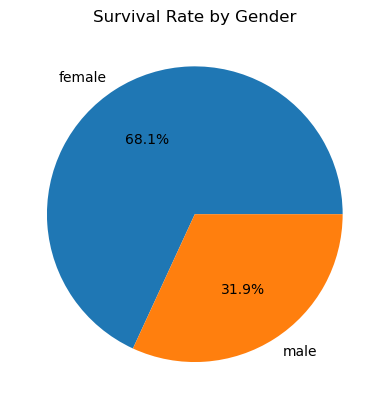

In [1457]:
#check about percentage of males vs females survived and visualize by pie chart 
survival_by_sex = df[df['Survived'] == 1]['Sex'].value_counts(normalize=True) * 100
survival_by_sex.plot(kind='pie', autopct='%1.1f%%', title='Survival Rate by Gender')
plt.ylabel('')
plt.show()

the percentage of survived female is 68.1%
the percentage of survived male is 31.9%
therfore sex of female has the highest survival percentage 

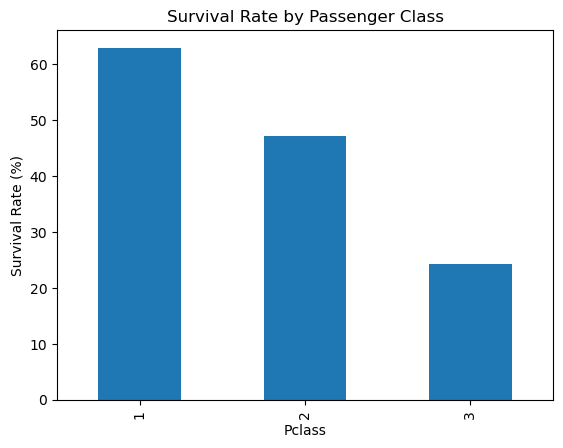

In [1458]:
#Compare survival rate across passenger classes (Pclass) and visualize by bar chart
survival_by_class = df.groupby('Pclass')['Survived'].mean() * 100
survival_by_class.plot(kind='bar', title='Survival Rate by Passenger Class')
plt.ylabel('Survival Rate (%)')
plt.xlabel('Pclass')
plt.show()

survival rate across passenger class 1 is > 60%
survival rate across passenger class 2 is >40%
survival rate across passenger class 3 is >20%
therfore class 1 has the highest survival rate and class 3 has the lowest survival rate.

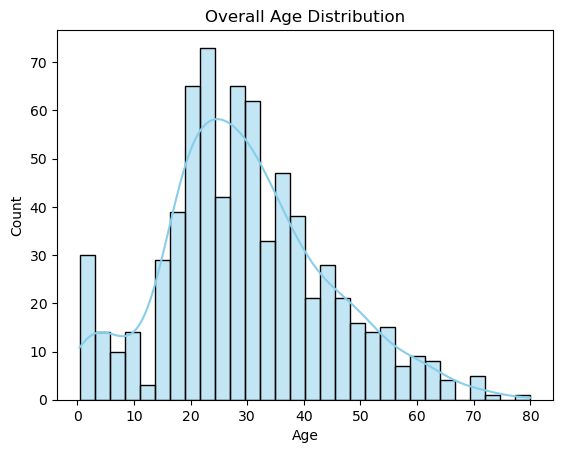

In [1459]:
#Plot the age distribution 
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Overall Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

the least frequent age of passengers is 80 
and the more frequent age of passengers is between 20 and 25

Average Age Comparison:
Non-survivors (0): 30.63 years
Survivors     (1): 28.34 years


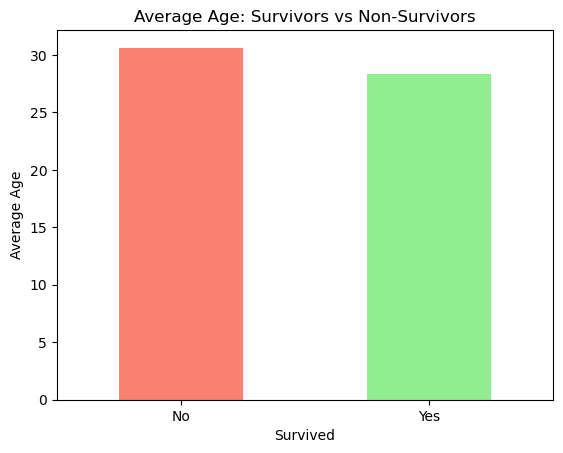

In [1460]:
#compare the average age of survivors vs non-survivors
avg_age = df.groupby('Survived')['Age'].mean()

print("Average Age Comparison:")
print(f"Non-survivors (0): {avg_age[0]:.2f} years")
print(f"Survivors     (1): {avg_age[1]:.2f} years")
avg_age.plot(kind='bar', color=['salmon', 'lightgreen'])
plt.title('Average Age: Survivors vs Non-Survivors')
plt.xlabel('Survived')
plt.ylabel('Average Age')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.show()

the average age of Non-survivors(30.63 years) is greater than the average age of survivors(28.34 years)

In [1461]:
#check if  passengers with family (SibSp or Parch) have higher survival rates
df['family'] = df['SibSp'] + df['Parch']
df['has_family'] = df['family'] > 0

survival_with_family = df.groupby('has_family')['Survived'].mean() * 100
print(survival_with_family)

has_family
False    30.353818
True     50.564972
Name: Survived, dtype: float64


passengers with family have higher survival rates than other passengers

In [1462]:
#calculate the survival rate for passengers who paid more than the average fare
avg_fare = df['Fare'].mean()
df['paid_high'] = df['Fare'] > avg_fare

high_fare_survival = df.groupby('paid_high')['Survived'].mean() * 100
print(high_fare_survival)

paid_high
False    31.764706
True     59.715640
Name: Survived, dtype: float64


passengers who paid more than the average fare(high paid )  have  higher survival rate than passengers with low paid

In [1463]:
#check about nulls (empty rows) and its ratio 
null=df.isnull().sum()
ratio=null/df.shape[0]
pd.DataFrame({"Null_sum":null,"Ratio":ratio}).T

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family,has_family,paid_high
Null_sum,0.0,0.0,0.0,0.0,0.0,177.000000,0.0,0.0,0.0,0.0,687.000000,2.000000,0.0,0.0,0.0
Ratio,0.0,0.0,0.0,0.0,0.0,0.198653,0.0,0.0,0.0,0.0,0.771044,0.002245,0.0,0.0,0.0


embarked have  0.002245	ratio of nulls only of data which have very low ratio of nulls on data then we will drop only null rows 
,Cabin have 0.771044 ratio of nulls only of data which is very high ratio of nulls on data then we will drop this column and Age have 0.198653 ratio of nulls only of data so we will handel this column nulls 

In [1464]:
#drop emparked null rowms only
df=df.dropna(subset=['Embarked'])
#drop cabin column
df=df.drop("Cabin",axis=1)

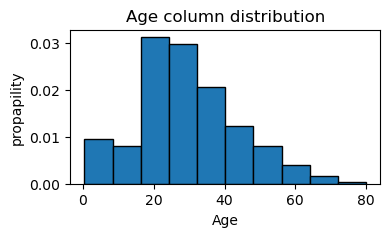

In [1465]:
#check if age column has normal distribution then apply mean to nulls 
plt.figure(figsize=(4,2))
plt.hist(df['Age'],density=True,edgecolor="black")
plt.title("Age column distribution")
plt.xlabel("Age")
plt.ylabel("propapility")
plt.show()

column age doesnt have normal distribution 

In [1466]:
#fill nulls of age column with meadian
median=df["Age"].median()
median
df["Age"].fillna(median,inplace=True)

In [1467]:
pd.DataFrame(df.isnull().sum()).T

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family,has_family,paid_high
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


there isn't any nulls in the dataset 

In [1468]:
#check about duplicated rows
df.duplicated().sum()


np.int64(0)

there isnot any duplicated row

In [1469]:
def get_age_group(age):
    if pd.isnull(age):
        return 'unknown'
    elif age < 16:
        return 'child'
    elif age < 60:
        return 'adult'
    else:
        return 'senior'

df['age_group'] = df['Age'].apply(get_age_group)

group_survival = df.groupby('age_group')['Survived'].mean() * 100
print(group_survival)

age_group
adult     36.491677
child     59.036145
senior    24.000000
Name: Survived, dtype: float64


the child passengers (age < 16) have the highest survivel rate which is 59.036145
,the adult passengers (age < 60) have the middle survivel rate which is 36.491677
and the senior passengers (age > 60) have the lowest survivel rate which is 24.000000


In [1470]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family,has_family,paid_high,age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,True,False,adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,True,True,adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,False,False,adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,True,True,adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,False,False,adult


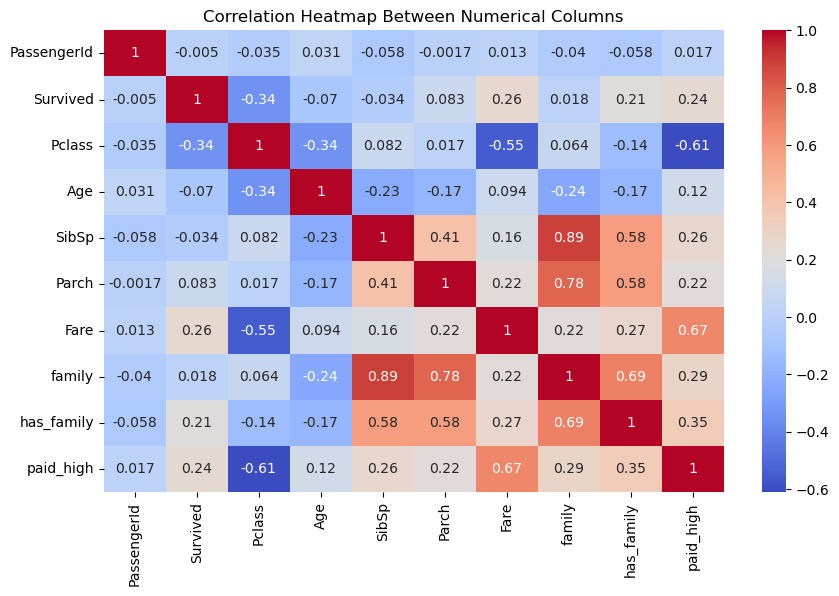

In [1471]:
#heatmap to display the corelation between numerical data
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap Between Numerical Columns')
plt.show()

column passenger id doesnt have any strong relation with any column so it isnot an important column ,column survived doesnt have any strong relation with any column  because it needs to convert into category datatype ,column pclass has strong relation with Paid_high (-0.61) and Fare (0.55) and it has weak relation with other columns,column Age doesnt have any strong relation with any column (but its an important column ) ,column SibSp has strong relation with Family (0.89) and has_family (0.58) and it has weak relation with other columns ,column Parch has strong relation with Family (0.78) and has_family (0.58) and it has weak relation with other columns ,column Fare has strong relation with Paid_high (0.67) and pclass (-0.55) and it has weak relation with other columns,column Family has strong relation with SibSp (0.89) ,has_family (0.69) and Parch (0.78) and it has weak relation with other columns ,column has_family has strong relation with SibSp (0.58) ,Parch (0.58) and family (0.69) and it has weak relation with other columns ,column paid_high has strong relation with pclass (-0.61) and Fare (0.67) and it has weak relation with other columns

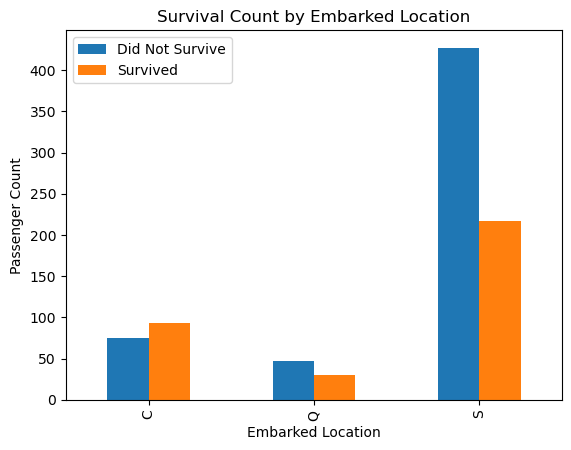

Embarked
C    55.357143
Q    38.961039
S    33.695652
Name: Survived, dtype: float64
Location with highest survival rate: C


In [1472]:
#Plot survival counts for each Embarked location (Embarked)
survival_by_embarked = df.groupby(['Embarked', 'Survived']).size().unstack()

survival_by_embarked.plot(kind='bar')
plt.title('Survival Count by Embarked Location')
plt.xlabel('Embarked Location')
plt.ylabel('Passenger Count')
plt.legend(['Did Not Survive', 'Survived'])
plt.show()

survival_rate = df.groupby('Embarked')['Survived'].mean()*100
print(survival_rate)
print("Location with highest survival rate:", survival_rate.idxmax())

the embarked location C have the highest survivel rate which is 55.357143
the embarked location Q have the middle survivel rate which is 38.961039
the embarked location S have the smallest survivel rate which is 55.357143
and the plot shows that in Q,S number of passengers not survived is more than survived while in C number of passengers survived is more than not survived.


In [1473]:
#drop the new added columns
df=df.drop(['family','has_family','age_group','paid_high'],axis=1)

In [1474]:
#show number of unique values in each column and their datatypes
dtypes=df.dtypes
n_uniq=df.nunique()
pd.DataFrame({"Dtypes":dtypes,"Num_Unique":n_uniq}).T

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
Dtypes,int64,int64,int64,object,object,float64,int64,int64,object,float64,object
Num_Unique,889,2,3,889,2,88,7,7,680,247,3


number of unique values  and data type in each column : PassengerId=889 (int64),Survived=2 (int64),Pclass=3 (int64),Name=889 (object),Sex=2 (object),Age=88 (float64),SibSp=7 (int64),Parch=7 (int64) ,Ticket=680 (object),Fare=247 (float64),Embarked=3 (object)

In [1475]:
#convert some columns into category datatype
cols=["Pclass","SibSp","Parch","Sex","Embarked","Survived"]
df[cols]=df[cols].astype('category')
pd.DataFrame(df.dtypes).T

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,int64,category,category,object,category,float64,category,category,object,float64,category


Pclass,SibSp,Parch,Sex,Embarked,Survived are converted into categories while the other columns still the same

In [1476]:
#delete unimportent columns
df.drop(["PassengerId","Name","Ticket"],axis=1,inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


dataframe become without these columns (PassengerId,Name,Ticket)

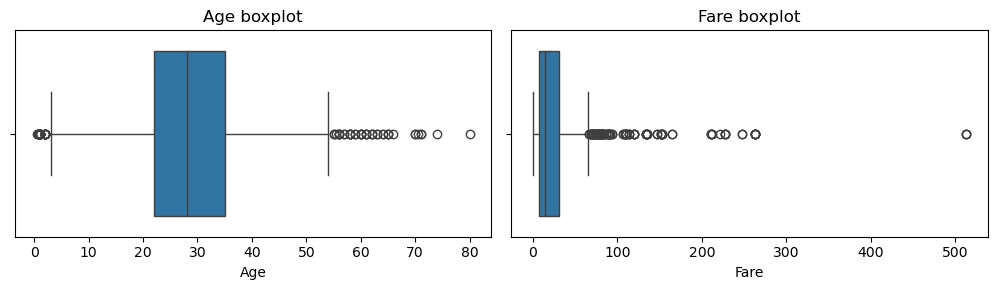

In [1477]:
#check about outliers
num_cols = df.select_dtypes("number").columns

n_cols = 4
n_rows = (len(num_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 3 * n_rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], ax=axes[i], orient="h")
    axes[i].set_title(f"{col} boxplot")
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

columns Age,Fare have outliers 

In [1478]:
#remove outliers
for col in num_cols:
  Q1=df[col].quantile(.25)
  Q3=df[col].quantile(.75)
  IQR=Q3-Q1
  lower_Fence=Q1-1.5*IQR
  upper_Fence=Q3+1.5*IQR
  lower_outliers=df[df[col]<lower_Fence][col].values
  upper_outliers=df[df[col]>upper_Fence][col].values
  df[col].replace(lower_outliers,lower_Fence,inplace=True)
  df[col].replace(upper_outliers,upper_Fence,inplace=True)

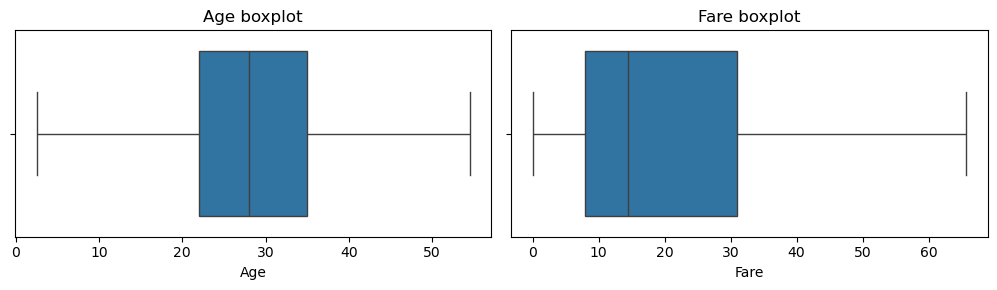

In [1479]:
#check again about outliers

num_cols = df.select_dtypes("number").columns

n_cols = 4
n_rows = (len(num_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 3 * n_rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], ax=axes[i], orient="h")
    axes[i].set_title(f"{col} boxplot")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

there isnot any outlier in any column 

In [1480]:
#split the data
x=df.drop("Survived",axis=1)
y=df["Survived"]

x contains all columns of dataset except the target column(Survived)
y contains only the target column(Survived)from this dataset

In [1481]:
#normalize numerical columns
from sklearn.preprocessing import MinMaxScaler
num_cols=x.select_dtypes('number').columns
scaler=MinMaxScaler()
scaler.fit(x[num_cols])
x[num_cols]=scaler.transform(x[num_cols])
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,0.375000,1,0,0.110424,S
1,1,female,0.682692,1,0,1.000000,C
2,3,female,0.451923,0,0,0.120704,S
3,1,female,0.625000,1,0,0.808757,S
4,3,male,0.625000,0,0,0.122608,S
...,...,...,...,...,...,...,...
886,2,male,0.471154,0,0,0.198001,S
887,1,female,0.317308,0,0,0.456925,S
888,3,female,0.490385,1,2,0.357163,S
889,1,male,0.451923,0,0,0.456925,C


every numerical column changes its values to be from 0 to 1

In [1482]:
from sklearn.preprocessing import LabelEncoder
df_encoded = df.copy()
le_sex = LabelEncoder()
le_embarked = LabelEncoder()

df_encoded['Sex'] = le_sex.fit_transform(df_encoded['Sex'])
df_encoded['Embarked'] = le_embarked.fit_transform(df_encoded['Embarked'])
x = df_encoded.drop("Survived", axis=1)
y = df_encoded["Survived"]
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,65.6563,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2
887,1,0,19.0,0,0,30.0000,2
888,3,0,28.0,1,2,23.4500,2
889,1,1,26.0,0,0,30.0000,0


encoded categorical columns

In [1483]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [1484]:
# Split the dataset into training and testing sets
# 80% for training, 20% for testing, with a fixed random state for reproducibility
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model with max_depth and max_features
# n_estimators Number of trees in the forest,max_depth is Maximum depth of each tree to prevent overfitting, random_state=42 is Random seed for reproducibility

rf = RandomForestClassifier(n_estimators=100, max_depth=4, max_features='sqrt', random_state=42)
rf.fit(x_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(x_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8258


In [1485]:
# Try different values of n_estimators and check the accuracy
for n in [10, 100, 500]:
    rf = RandomForestClassifier(n_estimators=n, max_depth=4, max_features='sqrt', random_state=42)
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"n_estimators = {n}, Accuracy = {acc:.4f}")

n_estimators = 10, Accuracy = 0.8371


n_estimators = 100, Accuracy = 0.8258
n_estimators = 500, Accuracy = 0.8371


when n_estimators = 10 then Accuracy = 0.8034
when n_estimators = 100 then Accuracy = 0.8202
when n_estimators = 500 then Accuracy = 08090     

the best accurcy when n_estimators = 100, Accuracy = 0.8202

In [1486]:
#code to check if overfitting or underfitting

# 80% for training, 20% for testing, with a fixed random state for reproducibility
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model with max_depth and max_features
rf = RandomForestClassifier(n_estimators=500, max_depth=4, max_features='sqrt', random_state=42)
rf.fit(x_train, y_train)

# Make predictions on both training and test sets
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)

# Calculate and print the accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy : {test_accuracy:.4f}")

Training Accuracy: 0.8439
Testing Accuracy : 0.8371


Training Accuracy:0.8439 ,Testing Accuracy : 0.8371 therefore the difference between them not very big so there isnot overfitting and underfitting

In [1487]:
# Predict the first 10 samples
predicted = rf.predict(x_test[:10])
actual = y_test[:10].values

# Create a DataFrame to show both side by side
comparison_df = pd.DataFrame({
    "Actual": actual,
    "Predicted": predicted
})

# Display the comparison table
print(comparison_df)

  Actual  Predicted
0      0          0
1      1          1
2      1          1
3      0          0
4      1          1
5      1          0
6      0          0
7      0          0
8      1          1
9      1          1


There is 1 wrong prediction: row 5 was predicted as 0 instead of 1

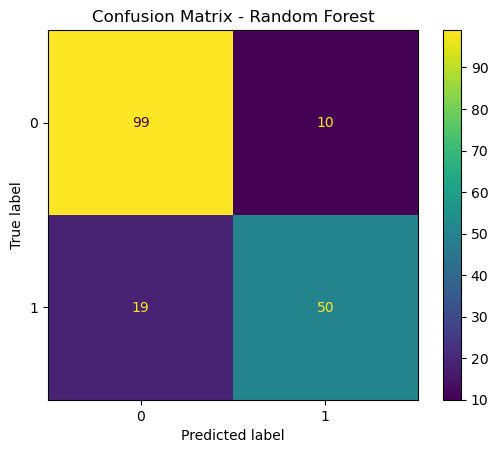

Confusion Matrix:
[[99 10]
 [19 50]]
Accuracy : 0.8371
Precision: 0.8333
Recall   : 0.7246
F1 Score : 0.7752


In [1488]:
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = rf.predict(x_test)

# Plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(rf, x_test, y_test)
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Print confusion matrix as text
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate and print evaluation metrics
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy : {acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

99 people were correctly predicted as not survived (True Negatives).

50 people were correctly predicted as survived (True Positives).

10 people were incorrectly predicted as survived, but they did not survive (False Positives).

19 people were incorrectly predicted as not survived, but they actually survived (False Negatives).

Accuracy: 0.8371
→ The model correctly predicted about 84% of all cases.

Precision: 0.8333
→ Of all the passengers the model predicted as survived, around 83% actually survived.

Recall: 0.7246
→ Of all the passengers who actually survived, the model correctly identified about 72% of them.

F1 Score: 0.7752
→ This is the harmonic mean of precision and recall. It gives a balanced measure between the two.

In [1489]:
 #Get feature importances from the model
importances = pd.Series(rf.feature_importances_, index=x.columns)

# Sort and get the top 3 most important features
top_3 = importances.sort_values(ascending=False).head(3)
print("Top 3 Important Features:")
print(top_3)

Top 3 Important Features:
Sex       0.459902
Pclass    0.164242
Fare      0.161963
dtype: float64


Sex = 0.459902 is the highest importance column then Pclass =0.164242  then Fare=0.161963

In [1490]:
#evaluate model performance by cross_val_score
from sklearn.model_selection import cross_val_score

# Evaluate the model using 5-fold cross-validation
cv_scores = cross_val_score(rf, x, y, cv=5)

# Print each fold's accuracy and the average
print("Cross-validation scores:", cv_scores)
print("Average cross-validation accuracy:", cv_scores.mean())

Cross-validation scores: [0.76404494 0.82022472 0.83146067 0.79213483 0.85310734]
Average cross-validation accuracy: 0.812194502634419


The model's performance is stable, with all accuracy scores ranging between 0.775 and 0.825, indicating no major fluctuations.
The average accuracy is above 80%, which shows strong overall performance.
There is no sign of overfitting, as the scores are consistent across folds.
This means the model generalizes well to unseen data

In [1491]:
depth_values = [2, 4, 10, None]

for depth in depth_values:
    rf = RandomForestClassifier(n_estimators=500, max_depth=depth, max_features='sqrt', random_state=42)
    rf.fit(x_train, y_train)

    y_train_pred = rf.predict(x_train)
    y_test_pred = rf.predict(x_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    print(f"max_depth = {depth}")
    print(f"  Train Accuracy = {train_acc:.4f}")
    print(f"  Test Accuracy  = {test_acc:.4f}")
    print(f"  Overfitting Gap = {train_acc - test_acc:.4f}")
    print("-" * 40)

max_depth = 2
  Train Accuracy = 0.7989
  Test Accuracy  = 0.7978
  Overfitting Gap = 0.0011
----------------------------------------
max_depth = 4
  Train Accuracy = 0.8439
  Test Accuracy  = 0.8371
  Overfitting Gap = 0.0068
----------------------------------------
max_depth = 10
  Train Accuracy = 0.9480
  Test Accuracy  = 0.7753
  Overfitting Gap = 0.1727
----------------------------------------
max_depth = None
  Train Accuracy = 0.9845
  Test Accuracy  = 0.7697
  Overfitting Gap = 0.2149
----------------------------------------


When max_depth = 2 then Train Accuracy = 0.7989, Test Accuracy = 0.7978 → it makes underfitting.
When max_depth = 4 then Train Accuracy = 0.8439, Test Accuracy = 0.8371 → it doesn't have underfitting or overfitting.
When max_depth = 10 then Train Accuracy = 0.9480, Test Accuracy = 0.7753 → it makes overfitting.
When max_depth = None then Train Accuracy = 0.9845, Test Accuracy = 0.7697 → it makes overfitting and it's the worst.

 So, the best max_depth is 4 

In [1492]:
# 80% for training, 20% for testing, with a fixed random state for reproducibility
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model with max_depth and max_features
rf = RandomForestClassifier(n_estimators=500, max_depth=4, max_features='sqrt', random_state=42)
rf.fit(x_train, y_train)

# Make predictions on both training and test sets
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)

# Calculate and print the accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy : {test_accuracy:.4f}")

Training Accuracy: 0.8439
Testing Accuracy : 0.8371


In [1493]:
#Compare Random Forest accuracy with a simple Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Train a Decision Tree model
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(x_train, y_train)

# Predict using Decision Tree
y_pred_dt = dt.predict(x_test)
dt_acc = accuracy_score(y_test, y_pred_dt)

# Print accuracy for both models
print(f"Decision Tree Accuracy: {dt_acc:.4f}")
print(f"Random Forest Accuracy: {test_accuracy:.4f}")

Decision Tree Accuracy: 0.8202
Random Forest Accuracy: 0.8371


Random Forest is better because its accuracy is 0.8371 , higher than the Decision Tree accurcy (0.8202). It works better as it combines many trees together while Decision Tree contains only one tree

In [1495]:
import joblib
joblib.dump(rf, 'titanic_model.pkl')

['titanic_model.pkl']